In [ ]:
#KINTALI SAHIL
#CS20B1114

In [1]:
import numpy as np
import cv2
import array
import pandas as pd
import math
import cmath
from matplotlib import pyplot as plt

In [9]:
def dft(signal):
    F=[]
    M=len(signal)
    for u in range(0,M):
        temp=0
        for x in range(0,M):
            temp+=signal[x]*(np.exp((-2j)*np.pi*u*x/M))
        F.append(temp)
    return(F)

def fft(f):
    M=len(f)
    odd=[]
    even=[]
    G=[]
    H=[]
    if M==1:
        return(dft(f))
    else:
       for i in range(M):
        if i%2==0:
            even.append(f[i])
        else:
            odd.append(f[i])
       G=(dft(even)).copy()
       H=(dft(odd)).copy()
       F1=[]
       F2=[]
       for u in range(0,int(M/2)):
           temp1=G[u]+np.multiply(np.exp(-2j*np.pi*u/M),H[u])
           F1.append(temp1)
       for u in range(int(M/2),M):
           temp2=G[u-int(M/2)]-np.multiply(np.exp(-2j*np.pi*(u-int(M/2))/M),H[u-int(M/2)])
           F1.append(temp2)
       return(F1)

a=[1,2,3,4,5,6,7,8,9,10]
#print("inbuilt:",np.fft.fft(a))
#print("calling fft:",fft(a))

In [10]:
img = cv2.imread("llena.png",0)
def find_fft(img):
    row=[]
    col=[]
    result = np.array(img)
    for p in result:
        row.append(fft(p))
    result2 = np.array(row)
    
    for p in result2.T:
        col.append(fft(p))
    result3 = np.array(col)
    #print("inbuilt fft2 : ",np.fft.fft2(result))
    return result3.T
#print("user defined:  ",find_fft(img))

In [11]:
dog = cv2.imread("dog.jpg",0)
def magnitude(matrix):
    mag=[]
    mag2=[]
    li1=[]
    li2=[]
    for i in range(0,matrix.shape[0]):
        li1=[]
        li2=[]
        for j in range(0,matrix.shape[1]):
            li2.append(abs(matrix[i][j]))
            li1.append(((matrix[i][j].real)*(matrix[i][j].real) + (matrix[i][j].imag)*(matrix[i][j].imag))**0.5)
        mag.append(li1)
        mag2.append(li2)
    mag=np.array(mag)
    mag2=np.array(mag2)
    #print(mag)
    return mag
def phase(matrix):
    phase=[]
    li=[]
    for i in range(0,matrix.shape[0]):
        li=[]
        for j in range(0,matrix.shape[1]):
            li.append((cmath.phase(matrix[i][j])))
        phase.append(li)
    phase=np.array(phase)
    #print("phase is : ",phase)
    return phase
fft_lena = find_fft(img)
fft_dog = find_fft(dog)



In [12]:
lena_mag_dog_phase = magnitude(fft_lena)*(np.exp(1j*phase(fft_dog)))
#print("combined matrix with magnitude of lena and phase of dog:\n\n", lena_mag_dog_phase)


In [13]:
dog_mag_lena_phase = magnitude(fft_dog)*(np.exp(1j*phase(fft_lena)))
#print("combined matrix with magnitude of dog and phase of lena: \n\n", dog_mag_lena_phase)

In [15]:
def idft(signal):
    F=[]
    M=len(signal)
    for u in range(0,M):
        temp=0
        for x in range(0,M):
            temp+=(signal[x]*(np.exp((2j)*np.pi*u*x/M)))
        F.append(temp)
    return(F)

def find_idft(img):
    idft_result = idft(img)
    idft_real=[]
    for item in idft_result:
        idft_real.append(item.real)
    #print("inbuilt",np.fft.ifft(img))
    return idft_real
#print("user def: ",find_idft(img))

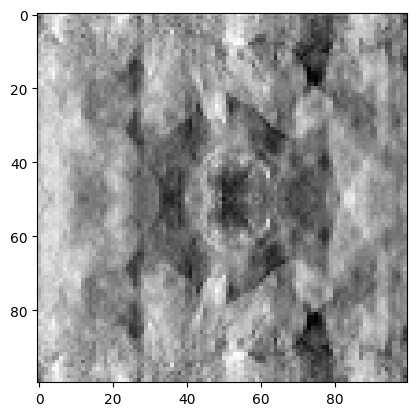

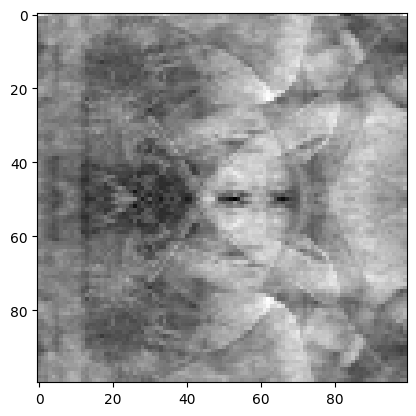

In [16]:
def original(img):
    row=[]
    col=[]
    m,n=img.shape
    result = np.array(img)
    for p in result:
        row.append(find_idft(p))
    result2 = np.array(row)
    for p in result2.T:
        col.append(find_idft(p))
    result3 = np.array(col)
    return (result3.T/(m*n))

orig_img_dog = original(lena_mag_dog_phase)
orig_img_lena = original(dog_mag_lena_phase)


#print("idft image:  ",(orig_img_lena))

plt.imshow(orig_img_dog,cmap='gray')
plt.show()
plt.imshow(orig_img_lena,cmap='gray')
plt.show()

